# **Final Report**
**Olympic Data and Economic Indicator**

###  Table of Contents
1. Introduction  
2. Exploratory Data Analysis (EDA)
3. Merging Process  
4. Main Analysis
    - Medal Ranking and Development Indicators  
5. Predictive Modeling  
   - Logistic Regression  
   - Random Forest
   - Feature Importance  
   - KMeans
6. Conclusion 

### Dataset Sources

**athlete_events.csv**
https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history

**gdp.csv**	
https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths 

**Gross National Income Per Capita.csv**
https://www.kaggle.com/datasets/iamsouravbanerjee/gross-national-income-per-capita

**Human Development Index.csv**
https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset 

**world_population.csv**	
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset 

# Introduction

The Olympic Games are not only a global celebration of athletic excellence but also a reflection of broader social, economic, and political dynamics among participating nations. While athletic skill and training play a fundamental role in achieving medal success, many have long suspected that a country’s economic and human development status may significantly influence its Olympic performance.

This project explores the relationship between Olympic medal rankings and national development indicators—specifically Gross Domestic Product (GDP), Gross National Income per capita (GNI), Human Development Index (HDI), and population. By integrating diverse datasets and conducting a combination of exploratory data analysis (EDA), classification modeling, and clustering, this analysis seeks to uncover patterns in how economic strength and development levels relate to Olympic success.

The goal is twofold: first, to assess whether there is a consistent correlation between medal performance and development indicators; and second, to evaluate whether machine learning models can predict top-performing countries based on these metrics. Through this lens, the project not only provides insight into sports analytics but also sheds light on the socioeconomic structures behind global athletic performance.

# 1. EDA

## EDA 1-1 Olympic Data
#### Description : My analysis aims to explore the correlation between Olympic performance and economic development indicators. The exploratory data analysis (EDA) is divided into two parts: the first part focuses on Olympic performance data, and the second part covers economic indicator data. The following code pertains to the first part of the EDA, and detailed explanations are provided alongside each code segment.

In [2]:
import os
os.chdir('C:\\Users\\piano')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
events_df = pd.read_csv("Datasets/athlete_events.csv")
events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### After loading the data, I used describe() to examine the basic statistics of the numeric columns, and info() to check the structure, column names, and data types.I then checked for null values and found that a significant number of missing values existed in a specific column.

In [5]:
events_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
events_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### After identifying the null values, I began the data cleaning and column selection process in earnest. First, I removed the Winter Olympics data, as it is more heavily influenced by geographic and cultural factors compared to the Summer Olympics.Considering the global nature of the analysis, the Winter Olympics introduced a significant bias. In fact, the number of participating countries in the Summer Olympics is typically about twice that of the Winter Olympics. 
#### I also removed columns that were clearly unnecessary for the analysis—specifically, the Height, Weight, and Games columns. Among them, Height and Weight had the highest proportion of missing values. Even if I had attempted to impute them based on certain criteria, they were not suitable for micro-level analysis and, from a macro-level perspective, were deemed irrelevant. Therefore, I considered it reasonable to drop them.

In [162]:
# Only use Summer season 
summer_df = events_df[events_df['Season'] == 'Summer']

In [9]:
summer_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [163]:
# drop unnecessary columns
summer_df = summer_df.drop(columns =['Height', 'Weight', 'Games'])

#### Although I was initially unsure whether to include the Age column in the analysis, I chose not to drop it because I was less certain about excluding it compared to the previous three features. Instead, I decided to process the null values by replacing them using a specific criterion.

#### To determine the appropriate method for imputation, I first analyzed the distribution of the Age data using a histogram. The histogram showed that the data followed a roughly normal distribution, but with a number of outliers. Therefore, rather than using the mean or mode, I decided to use the median value to fill in the missing ages.

#### As for the Medal column, the NaN values do not represent missing data, but instead indicate that the athlete did not win a medal. To make this distinction clear, I replaced all NaN values in the Medal column with the string 'No Medal'.

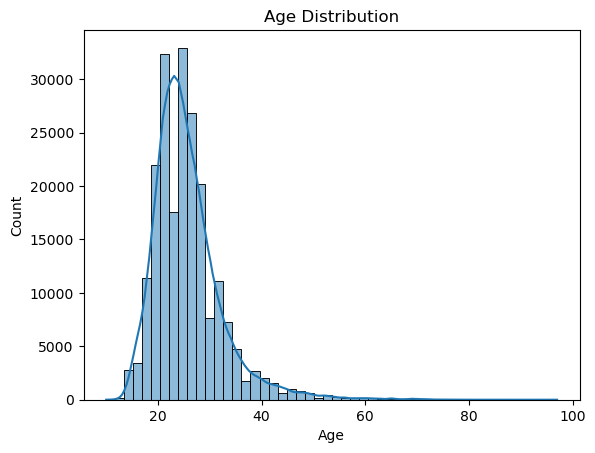

In [11]:
# Nan value processing in the Age column
# to check the distribution and outliers of Age column
sns.histplot(summer_df['Age'].dropna(), bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [164]:
# it looks like normal distribution but it's skewed and have some outliers, Thus I decide to use median to the Nan 
summer_df['Age'] = summer_df['Age'].fillna(summer_df['Age'].median())

In [165]:
# fill the Nan value in the medal column to the espression 'No Medal'
summer_df['Medal'] = summer_df['Medal'].fillna('No Medal')

In [14]:
summer_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [166]:
# Make an raking system
medaled_df = summer_df[summer_df['Medal'] != 'No Medal'].copy()

#### The following stage involves constructing a medal ranking structure by country. While this is essentially part of the final report, I decided to prepare it in advance to reduce confusion and mental load during the actual analysis phase. In the original dataset, each sample (row) represents the status of an individual athlete, and whether they won a medal is just one of many features. Therefore, if I wanted to extract country-level rankings for a specific Olympic year, it required significant data manipulation.

#### During this process, I went through a lot of trial and error. One of the biggest challenges I faced was the issue of overcounting medals for certain countries. For instance, in the case of the 2016 Rio de Janeiro Olympics, the U.S. was recorded as having won 145 medals — a number that was clearly inaccurate.

#### At this point, I considered switching to a cleaner, simpler dataset. However, I decided against it, as my goal was to practice and learn from the EDA and data wrangling process itself. Upon further investigation, I discovered that duplicate medals were being counted for team events.For example, Brazil won the gold medal in football, but since each athlete receives a medal, and each row in the dataset represents an individual athlete, the same medal was being counted multiple times — once per team member — rather than once per event.

#### Ultimately, I was able to reduce the effect of team-based duplication using the code that follows. Although there were still slight discrepancies compared to official Olympic results, the error margin was only around 1.6%, and more importantly, the overall ranking of countries remained consistent. Therefore, I concluded that this approach would not interfere with the broader goals of this project.

In [167]:
# delete dulicates
df_unique_medals = medaled_df.drop_duplicates(subset=['Year', 'Event', 'Medal', 'NOC', 'Team'])

In [168]:
medal_rank = (
    df_unique_medals
    .groupby(['Year', 'NOC', 'Team', 'Medal'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

In [169]:
medal_rank.columns.name = None

In [170]:
# rearrange the medal order

medal_rank = medal_rank[['Year', 'NOC', 'Team', 'Gold', 'Silver', 'Bronze']]


In [171]:
medal_rank_sorted = medal_rank.sort_values(['Year', 'Gold', 'Silver', 'Bronze'], ascending=[True, False, False, False])


In [172]:
medal_rank_sorted['Rank'] = (
    medal_rank_sorted
    .groupby('Year')
    .cumcount() + 1
)

In [21]:
top10_2016 = medal_rank_sorted[medal_rank_sorted['Year'] == 2016].head(10)
top10_2016 = top10_2016.reset_index(drop=True)
print(top10_2016)

Medal  Year  NOC           Team  Gold  Silver  Bronze  Rank
0      2016  USA  United States    45      36      36     1
1      2016  GBR  Great Britain    27      23      17     2
2      2016  CHN          China    25      18      25     3
3      2016  RUS         Russia    18      17      20     4
4      2016  GER        Germany    16      10      15     5
5      2016  JPN          Japan    12       8      21     6
6      2016  FRA         France    10      18      14     7
7      2016  KOR    South Korea     9       3       8     8
8      2016  AUS      Australia     8      11      10     9
9      2016  ITA          Italy     8      11       8    10


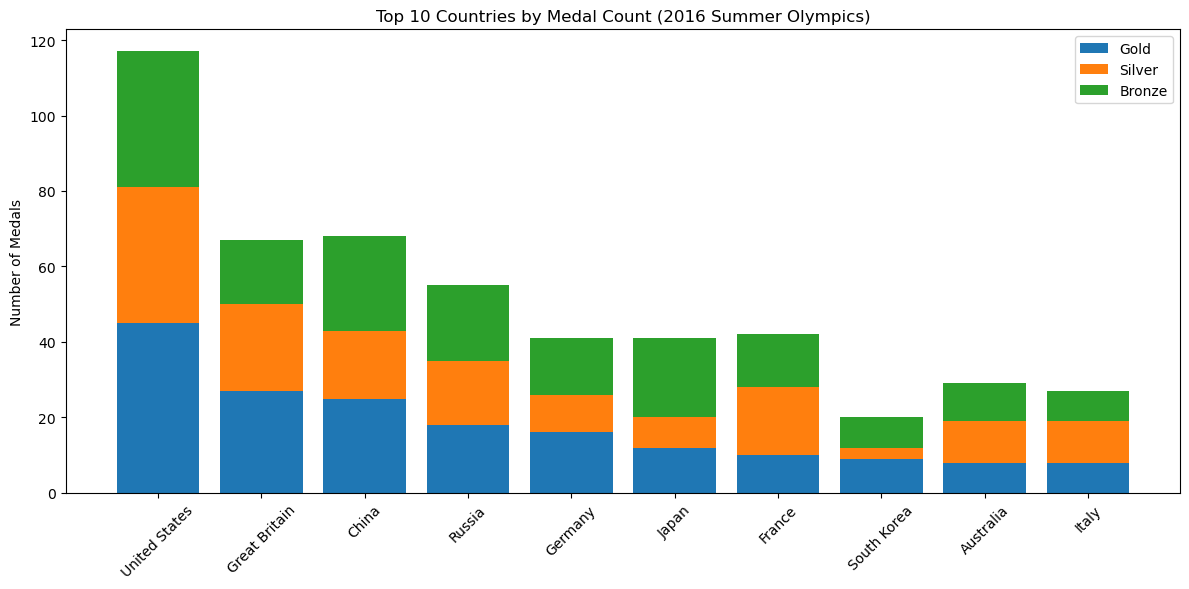

In [22]:
plt.figure(figsize=(12, 6))

# stacked bar chart
bar_width = 0.6
x = top10_2016['Team']

plt.bar(x, top10_2016['Gold'], label='Gold')
plt.bar(x, top10_2016['Silver'], bottom=top10_2016['Gold'], label='Silver')
plt.bar(x, top10_2016['Bronze'], 
        bottom=top10_2016['Gold'] + top10_2016['Silver'], label='Bronze')

plt.title('Top 10 Countries by Medal Count (2016 Summer Olympics)')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Finally, I checked the country codes (NOC) in preparation for joining the dataset with economic indicators, which are the next subject of EDA and part of the integrated analysis.

In [173]:
# Number of contires
medal_df = medal_rank_sorted
medal_df['NOC'].nunique()

147

In [174]:
top10_1988 = medal_df[medal_df['Year'] == 1988].head(10)
print(top10_1988)

      Year  NOC           Team  Gold  Silver  Bronze  Rank
1054  1988  URS   Soviet Union    54      31      46     1
1023  1988  GDR   East Germany    37      35      30     2
1055  1988  USA  United States    36      31      27     3
1033  1988  KOR    South Korea    12      10      10     4
1021  1988  FRG   West Germany    11      14      15     5
1025  1988  HUN        Hungary    11       6       6     6
1009  1988  BUL       Bulgaria    10      12      13     7
1046  1988  ROU        Romania     7      11       6     8
1020  1988  FRA         France     6       4       6     9
1029  1988  ITA          Italy     6       4       4    10


In [175]:
medal_df.head()

,Year,NOC,Team,Gold,Silver,Bronze,Rank
15,1896,USA,United States,11,6,2,1
11,1896,GRE,Greece,10,16,16,2
8,1896,GER,Germany,6,5,2,3
4,1896,FRA,France,5,4,2,4
6,1896,GBR,Great Britain,2,3,2,5


## EDA 1-2. Economic Indicator data
#### Description : The economic indicator data consists of three datasets: GDP, GNI, and HDI. I conducted EDA for each of these datasets individually. The section below focuses on the first dataset, GDP, and the remaining two datasets were analyzed in a similar manner. However, due to space limitations in this interim report, only the EDA for the GDP data is presented here. A detailed description and analysis of all three economic indicators will be included in the final report.

### 1-2-1. GDP Data
-Gross Domestic Product-

In [24]:
gdp_df = pd.read_csv("Datasets/gdp.csv")
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10


#### After loading the data and briefly examining its structure, I removed columns that were clearly not going to be used. I then used info() to further inspect the dataset and converted the Year column to integer type. Additionally, since the Country Code (NOC) will serve as a key in future steps, I checked the number of unique values in that column.

In [25]:
gdp_df = gdp_df.drop(columns=["Indicator Name", "Indicator Code"])

In [26]:
gdp_df = gdp_df.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Value'
)

In [27]:
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,2.421063e+10
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,1.190495e+10
4,Angola,AGO,1960,NaN


In [28]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17024 non-null  object 
 1   Country Code  17024 non-null  object 
 2   Year          17024 non-null  object 
 3   Value         14307 non-null  float64
dtypes: float64(1), object(3)
memory usage: 532.1+ KB


In [29]:
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'], errors='coerce')

In [30]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17024 non-null  object 
 1   Country Code  17024 non-null  object 
 2   Year          17024 non-null  int64  
 3   Value         14307 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 532.1+ KB


In [31]:
# Number of contires
gdp_df['Country Code'].nunique()

266

#### I then checked for null values and found that some of the GDP measurements were missing. These missing values were likely due to the absence of GDP data in earlier years, or a result of political or military circumstances that made data collection impossible. Given the nature of this analysis, I determined that it would be inappropriate to impute or interpolate these values, and therefore decided to remove them. Additionally, countries without recorded GDP values are unlikely to be relevant to the focus of this analysis, which further justified their exclusion.

In [32]:
gdp_df.isnull().sum()

Country Name       0
Country Code       0
Year               0
Value           2717
dtype: int64

In [33]:
# Drop samples with nan values
gdp_df = gdp_df.dropna(subset=['Value'])
gdp_df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

#### To examine the distribution and identify any outliers, I created a histogram using histplot. The distribution appeared right-skewed, which accurately reflects the real-world structure where a small number of countries account for the majority of the global economy. After applying a logarithmic transformation, the data formed a well-shaped normal distribution, making it more suitable for analysis. A boxplot was also used to further investigate outliers, and a few were found on the lower end of the distribution.

#### Upon inspecting the data, these outliers were identified as belonging to Tuvalu. After conducting a brief investigation of the country, I confirmed that these values were not incorrect, but rather accurate reflections of Tuvalu’s economic scale.

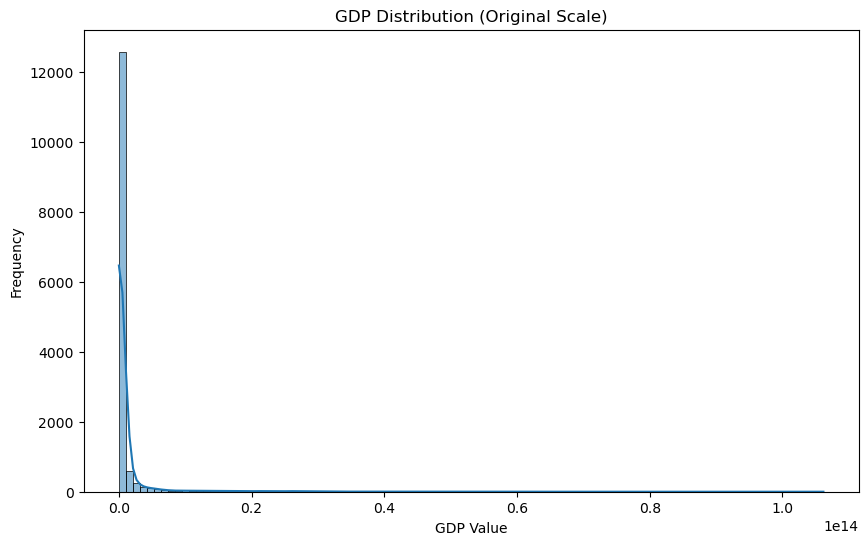

In [34]:
# The Reality of World Economic Imbalances
plt.figure(figsize=(10, 6))
sns.histplot(gdp_df['Value'], bins=100, kde=True)
plt.title('GDP Distribution (Original Scale)')
plt.xlabel('GDP Value')
plt.ylabel('Frequency')
plt.show()

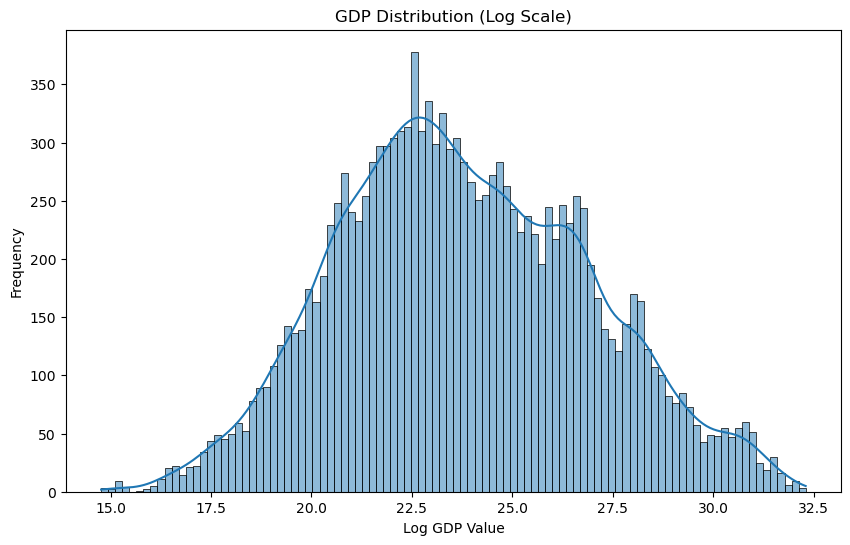

In [35]:
gdp_df['Log_Value'] = np.log1p(gdp_df['Value'])

plt.figure(figsize=(10, 6))
sns.histplot(gdp_df['Log_Value'], bins=100, kde=True)
plt.title('GDP Distribution (Log Scale)')
plt.xlabel('Log GDP Value')
plt.ylabel('Frequency')
plt.show()

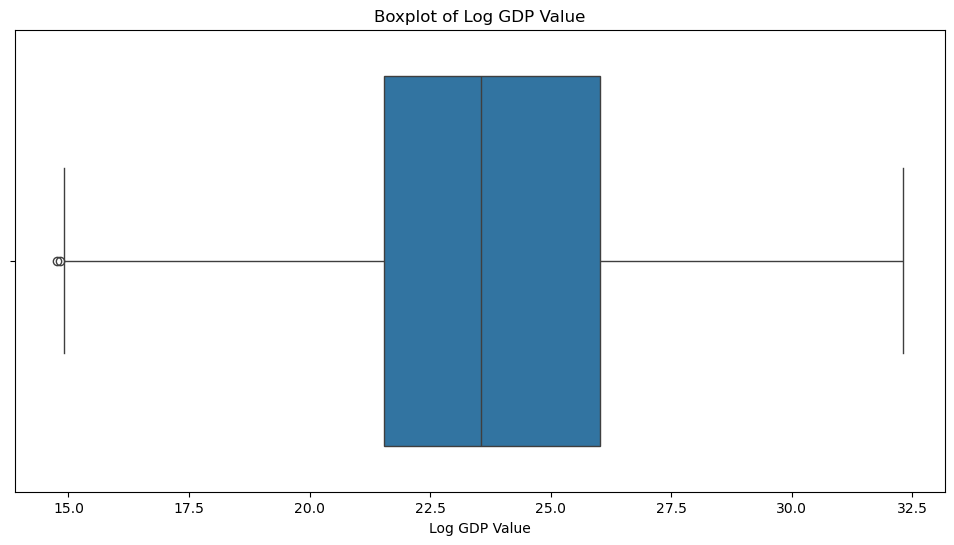

In [36]:
# outliers with boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=gdp_df['Log_Value'])
plt.title('Boxplot of Log GDP Value')
plt.xlabel('Log GDP Value')
plt.show()

In [37]:
q1 = gdp_df['Log_Value'].quantile(0.25)
q3 = gdp_df['Log_Value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr

outliers = gdp_df[gdp_df['Log_Value'] < lower_bound]

outliers_sorted = outliers.sort_values(by='Log_Value')
outliers_sorted[['Country Name', 'Country Code', 'Year', 'Value', 'Log_Value']].head(20)

,Country Name,Country Code,Year,Value,Log_Value
2905,Tuvalu,TUV,1970,2585955.874,14.765606
3171,Tuvalu,TUV,1971,2716989.584,14.815035


In [63]:
gdp_df.head()

,Country Name,Country Code,Year,Value,Log_Value
1,Africa Eastern and Southern,AFE,1960,2.421063e+10,23.910058
3,Africa Western and Central,AFW,1960,1.190495e+10,23.200220
13,Australia,AUS,1960,1.860768e+10,23.646840
14,Austria,AUT,1960,6.624086e+09,22.613978
16,Burundi,BDI,1960,1.960000e+08,19.093625


### --- Final Report Part ---

### 1-2-2. GNI Data
-Gross National Income per capita-

In [38]:
gni_df = pd.read_csv("Datasets/Gross National Income Per Capita.csv")
gni_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Gross National Income Per Capita (1990),Gross National Income Per Capita (1991),Gross National Income Per Capita (1992),...,Gross National Income Per Capita (2012),Gross National Income Per Capita (2013),Gross National Income Per Capita (2014),Gross National Income Per Capita (2015),Gross National Income Per Capita (2016),Gross National Income Per Capita (2017),Gross National Income Per Capita (2018),Gross National Income Per Capita (2019),Gross National Income Per Capita (2020),Gross National Income Per Capita (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2684.550019,2276.289409,2059.868084,...,2125.862821,2193.553936,2178.507021,2101.589319,2077.566899,2085.487571,2054.939895,2097.889450,1997.852149,1824.190915
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,4845.706901,5405.349257,2073.902390,...,7280.845666,7478.104777,7704.231949,7652.656486,7189.426672,6861.575738,6381.521946,6082.746624,5593.142060,5465.617791
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,4742.215529,3358.087827,3080.746654,...,11146.263030,11552.982470,11691.648290,12016.297600,12484.624200,12802.148310,13302.705960,13485.311240,12996.762910,14131.110390
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,43773.146500,43175.147600,41935.787200,...,47126.814610,46385.095200,48483.720320,49936.874540,52267.738320,52650.225760,53483.306630,54465.047400,47878.666640,51166.626610
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,102433.136000,96250.290360,93043.477370,...,57445.954750,60005.695360,62573.505310,65577.512240,66881.329740,67667.508460,67195.095230,68590.900940,63016.401220,62573.591810


In [39]:
gni_df = gni_df.melt(
    id_vars=[
        'ISO3', 'Country', 'Continent', 'Hemisphere',
        'Human Development Groups', 'UNDP Developing Regions', 'HDI Rank (2021)'
    ],
    var_name='Year',
    value_name='GNI_per_capita'
)

In [40]:
gni_df['Year'] = gni_df['Year'].str.extract(r'(\d{4})').astype(int)

In [41]:
gni_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Year,GNI_per_capita
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,1990,2684.550019
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,1990,4845.706901
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,1990,4742.215529
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,1990,43773.146500
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,1990,102433.136000


In [42]:
gni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO3                      6240 non-null   object 
 1   Country                   6240 non-null   object 
 2   Continent                 6240 non-null   object 
 3   Hemisphere                6240 non-null   object 
 4   Human Development Groups  6112 non-null   object 
 5   UNDP Developing Regions   4832 non-null   object 
 6   HDI Rank (2021)           6112 non-null   float64
 7   Year                      6240 non-null   int32  
 8   GNI_per_capita            6108 non-null   float64
dtypes: float64(2), int32(1), object(6)
memory usage: 414.5+ KB


In [43]:
gdp_df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
Log_Value       0
dtype: int64

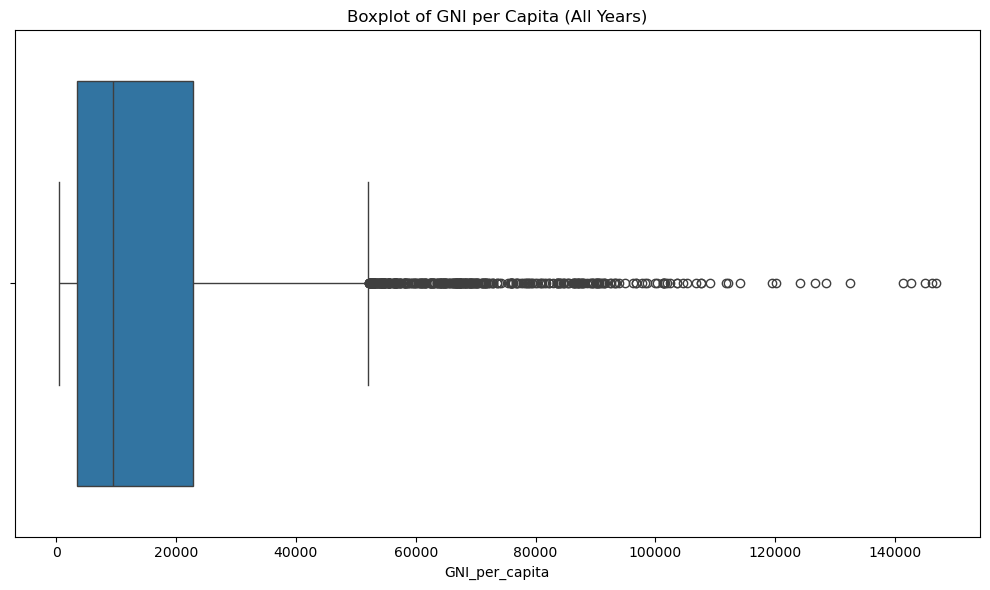

In [44]:
# Checking outliar
Q1 = gni_df['GNI_per_capita'].quantile(0.25)
Q3 = gni_df['GNI_per_capita'].quantile(0.75)
IQR = Q3 - Q1

outliers = gni_df[
    (gni_df['GNI_per_capita'] < Q1 - 1.5 * IQR) |
    (gni_df['GNI_per_capita'] > Q3 + 1.5 * IQR)
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=gni_df, x='GNI_per_capita')
plt.title('Boxplot of GNI per Capita (All Years)')
plt.tight_layout()
plt.show()

- **There may seem to be a lot of outliers, but these values do not need to be dealt with as they reflect the real world.**

### 1-2-3. HDI Data
-Human Development Index-

In [113]:
hdi_df = pd.read_csv("Datasets/Human Development Index - Full.csv")
hdi_df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [114]:
# filter columns
keep_cols = ['ISO3', 'Country'] + [col for col in hdi_df.columns if col.startswith('Human Development Index')]

hdi_filtered = hdi_df[keep_cols]

In [115]:
# Melt
hdi_df = hdi_filtered.melt(
    id_vars=['ISO3', 'Country'],
    var_name='Year',
    value_name='HDI'
)

hdi_df['Year'] = hdi_df['Year'].str.extract(r'(\d{4})').astype(int)

In [116]:
hdi_df.head()

,ISO3,Country,Year,HDI
0,AFG,Afghanistan,1990,0.273
1,AGO,Angola,1990,NaN
2,ALB,Albania,1990,0.647
3,AND,Andorra,1990,NaN
4,ARE,United Arab Emirates,1990,0.728


In [117]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISO3     6240 non-null   object 
 1   Country  6240 non-null   object 
 2   Year     6240 non-null   int32  
 3   HDI      5571 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 170.8+ KB


In [118]:
hdi_df.isnull().sum()

ISO3         0
Country      0
Year         0
HDI        669
dtype: int64

### 1-2-4 Population Data

In [137]:
pop_df = pd.read_csv("Datasets/world_population.csv")
pop_df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [138]:
pop_df_filtered = pop_df[[
    'Rank', 'CCA3', 'Country/Territory',
    '1970 Population', '1980 Population', '1990 Population', '2000 Population',
    '2010 Population', '2015 Population', '2020 Population', '2022 Population'
]]

In [139]:
pop_df_filtered = pop_df_filtered.rename(columns={'Country/Territory': 'Country', 'CCA3': 'ISO3'})

In [140]:
# Interpolation
# Since data for all years is not available, linear interpolation was used.
# This is considered valid given that population increases or decreases typically do not occur drastically within 1–2 years.

# Organize the year columns
available_years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
pop_df_filtered.columns = ['Rank', 'ISO3', 'Country'] + available_years

# Convert to wide format
pop_pivot = pop_df_filtered.set_index(['ISO3', 'Country'])[available_years]

# Add years to interpolate: continuous years from 1992 to 2020
fill_years = list(range(1992, 2021))  
for year in fill_years:
    if year not in pop_pivot.columns:
        pop_pivot[year] = np.nan

# Sort columns by year
pop_pivot = pop_pivot[sorted(pop_pivot.columns)]

# Apply linear interpolation
pop_interp = pop_pivot.interpolate(axis=1)

# Select only the required years
pop_selected = pop_interp[fill_years]

# melt (long format)
pop_df_final = pop_selected.reset_index().melt(
    id_vars=['ISO3', 'Country'],
    var_name='Year',
    value_name='Population'
)
pop_df_final['Year'] = pop_df_final['Year'].astype(int)


In [142]:
pop_df_final[pop_df_final['ISO3'] == 'KOR'].sort_values('Year')

,ISO3,Country,Year,Population
194,KOR,South Korea,1992,4.441654e+07
428,KOR,South Korea,1993,4.471305e+07
662,KOR,South Korea,1994,4.500956e+07
896,KOR,South Korea,1995,4.530606e+07
1130,KOR,South Korea,1996,4.560257e+07
1364,KOR,South Korea,1997,4.589907e+07
1598,KOR,South Korea,1998,4.619558e+07
1832,KOR,South Korea,1999,4.649209e+07
2066,KOR,South Korea,2000,4.678859e+07
2300,KOR,South Korea,2001,4.699104e+07


# 2. Merging Process 
on Country Code( ISO3 / ACC / NOC )

### 2-1. Indicator Data Merging

In [143]:
# rename to the key columns
gdp_df_p = gdp_df.rename(columns={'Country Code': 'ISO3'})

In [144]:
# Start with GDP
merged_df = gdp_df_p.rename(columns={'Country Name': 'Country'})

# Else (Common key: ISO3 + Year)
merged_df = merged_df.merge(gni_df[['ISO3', 'Year', 'GNI_per_capita']], on=['ISO3', 'Year'], how='left')
merged_df = merged_df.merge(hdi_df[['ISO3', 'Year', 'HDI']], on=['ISO3', 'Year'], how='left')
merged_df = merged_df.merge(pop_df_final[['ISO3', 'Year', 'Population']], on=['ISO3', 'Year'], how='left')

In [145]:
merged_df.head()

,Country,ISO3,Year,Value,Log_Value,GNI_per_capita,HDI,Population
0,Africa Eastern and Southern,AFE,1960,2.421063e+10,23.910058,NaN,NaN,NaN
1,Africa Western and Central,AFW,1960,1.190495e+10,23.200220,NaN,NaN,NaN
2,Australia,AUS,1960,1.860768e+10,23.646840,NaN,NaN,NaN
3,Austria,AUT,1960,6.624086e+09,22.613978,NaN,NaN,NaN
4,Burundi,BDI,1960,1.960000e+08,19.093625,NaN,NaN,NaN


In [149]:
# final column processing
merged_df = merged_df.drop(columns=['Log_Value'])
merged_df = merged_df.rename(columns={'Value': 'GDP'})

In [150]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14307 entries, 0 to 14306
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         14307 non-null  object 
 1   ISO3            14307 non-null  object 
 2   Year            14307 non-null  int64  
 3   GDP             14307 non-null  float64
 4   GNI_per_capita  6042 non-null   float64
 5   HDI             5520 non-null   float64
 6   Population      5947 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 782.5+ KB


In [151]:
merged_df.isnull().sum()

Country              0
ISO3                 0
Year                 0
GDP                  0
GNI_per_capita    8265
HDI               8787
Population        8360
dtype: int64

In [152]:
merged_df.head()

,Country,ISO3,Year,GDP,GNI_per_capita,HDI,Population
0,Africa Eastern and Southern,AFE,1960,2.421063e+10,NaN,NaN,NaN
1,Africa Western and Central,AFW,1960,1.190495e+10,NaN,NaN,NaN
2,Australia,AUS,1960,1.860768e+10,NaN,NaN,NaN
3,Austria,AUT,1960,6.624086e+09,NaN,NaN,NaN
4,Burundi,BDI,1960,1.960000e+08,NaN,NaN,NaN


In [148]:
merged_df.to_csv("merged_olympic_data.csv", index=False)

### 2-2. Olympic Data with Indicator data

National Olympic Committee code / International Organization for Standardization

The NOC codes in the Olympic data and the ISO3 codes in the economic indicators use different systems to represent countries, 
which is a key point in this analysis. Moreover, since many countries have dissolved or emerged since the 20th century, 
all these subtle differences must be manually reconciled.


In [184]:
# Merge NOC and ISO3

noc_to_iso3 = {
    'GER': 'DEU',     # Germany
    'FRG': 'DEU',     # West Germany
    'GDR': None,      # East Germany (excluded)
    'IRI': 'IRN',     # Iran
    'VIE': 'VNM',     # Vietnam
    'TPE': 'TWN',     # Chinese Taipei (Taiwan)
    'URS': None,      # Soviet Union (excluded)
    'ROC': 'RUS',     # Russian Olympic Committee → Russia
    'CRO': 'HRV',     # Croatia
    'NGR': 'NGA',     # Nigeria
    'SUI': 'CHE',     # Switzerland
    'ALG': 'DZA',     # Algeria
    'DEN': 'DNK',     # Denmark
    'GRE': 'GRC',     # Greece
    'INA': 'IDN',     # Indonesia
    'NED': 'NLD',     # Netherlands
    'BUL': 'BGR',     # Bulgaria
    'PHI': 'PHL',     # Philippines
    'MGL': 'MNG',     # Mongolia
    'CHI': 'CHL',     # Chile
    'CRC': 'CRI',     # Costa Rica
    'POR': 'PRT',     # Portugal
    'ZIM': 'ZWE',     # Zimbabwe
    'TAN': 'TZA',     # Tanzania
    'BER': 'BMU',     # Bermuda
    'PUR': 'PRI',     # Puerto Rico
    'SLO': 'SVN',     # Slovenia
    'BAH': 'BHS',     # Bahamas
    'TGA': 'TON',     # Tonga
    'ZAM': 'ZMB',     # Zambia
    'RSA': 'ZAF',     # South Africa
    'KSA': 'SAU',     # Saudi Arabia
    'SRI': 'LKA',     # Sri Lanka
    'URU': 'URY',     # Uruguay
    'BAR': 'BRB',     # Barbados
    'KUW': 'KWT',     # Kuwait
    'UAE': 'ARE',     # United Arab Emirates
    'SCG': 'SRB',     # Serbia and Montenegro → Serbia
    'PAR': 'PRY',     # Paraguay
    'MAS': 'MYS',     # Malaysia
    'SUD': 'SDN',     # Sudan
    'GUA': 'GTM',     # Guatemala
    'FIJ': 'FJI',     # Fiji
    'KOS': 'XKX',     # Kosovo (unofficial ISO3)
    'GRN': 'GRD',     # Grenada
    'NIG': 'NER'      # Niger
}

medal_df['ISO3'] = medal_df['NOC'].map(noc_to_iso3)
medal_df['ISO3'] = medal_df['ISO3'].fillna(medal_df['NOC'])

full_df = pd.merge(
    medal_df,
    merged_df,
    on=['ISO3', 'Year'],
    how='left'
)

In [186]:
full_df.to_csv("full_df.csv", index=False)

In [187]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1710 non-null   int64  
 1   NOC             1710 non-null   object 
 2   Team            1710 non-null   object 
 3   Gold            1710 non-null   int64  
 4   Silver          1710 non-null   int64  
 5   Bronze          1710 non-null   int64  
 6   Rank            1710 non-null   int64  
 7   ISO3            1710 non-null   object 
 8   Country         928 non-null    object 
 9   GDP             928 non-null    float64
 10  GNI_per_capita  613 non-null    float64
 11  HDI             604 non-null    float64
 12  Population      619 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 173.8+ KB


In [221]:
full_df = full_df[~full_df['Team'].str.endswith('-1')]

# 3. Main Analysis 

### 3-1 Correlation between Olympic medals & indicators - 1

In [189]:
# Generate rankings by indicator
full_df['GDP_rank'] = full_df.groupby('Year')['GDP'].rank(ascending=False)
full_df['HDI_rank'] = full_df.groupby('Year')['HDI'].rank(ascending=False)
full_df['GNI_rank'] = full_df.groupby('Year')['GNI_per_capita'].rank(ascending=False)
full_df['Pop_rank'] = full_df.groupby('Year')['Population'].rank(ascending=False)

**Chart Description**

This analysis aims to visualize the rankings of economic and development indicators for the top 20 medal-winning countries in the 2016 Rio Olympics, in order to explore the correlation between Olympic performance and economic indicators. The first chart, a variation of a heatmap, provides an at-a-glance view of the Olympic rankings and global rankings of various indicators. The second chart, a radar chart, illustrates how these indicators vary according to Olympic rankings.

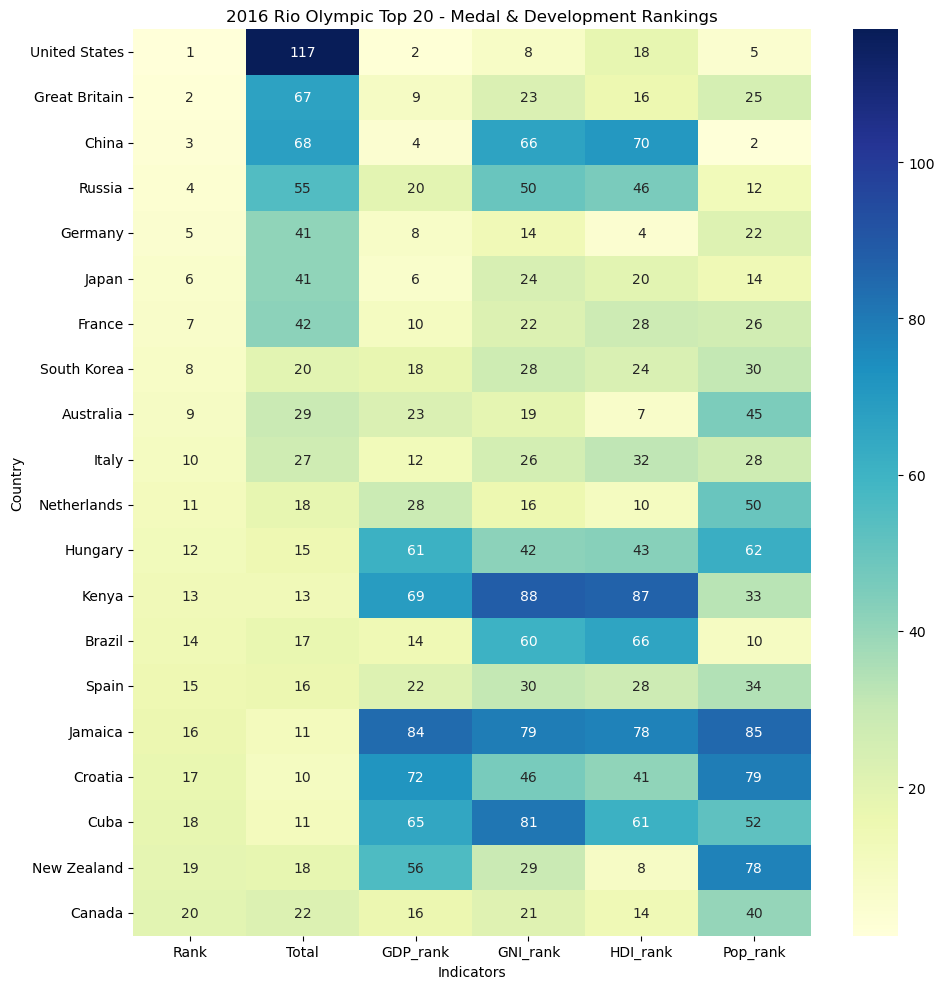

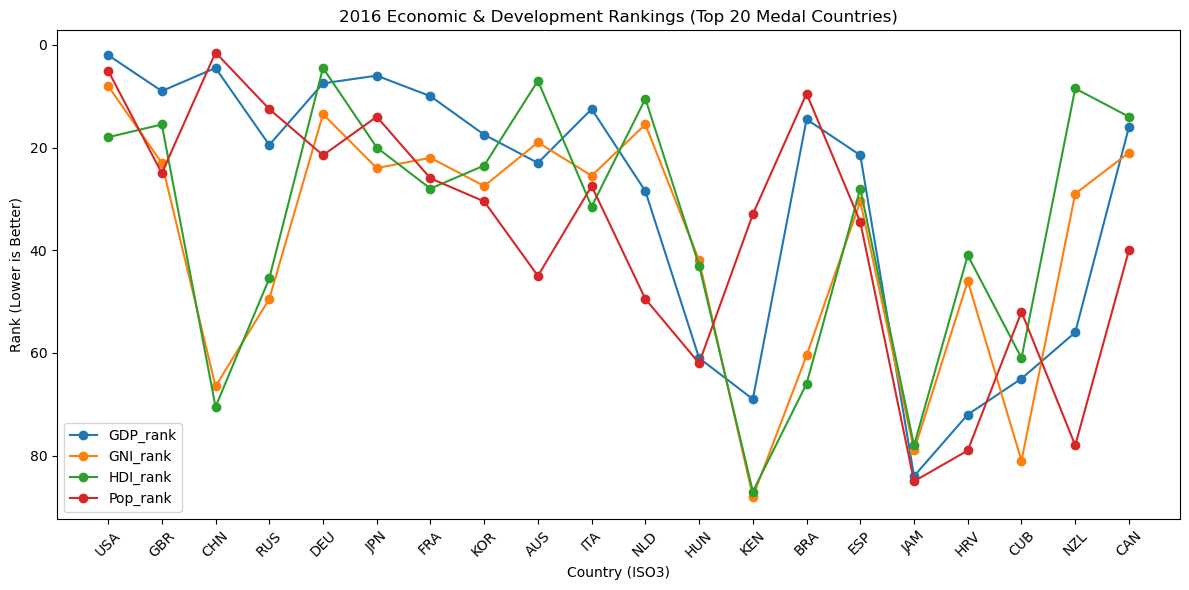

In [220]:
df_2016 = full_df[full_df['Year'] == 2016].copy()
top20 = df_2016.nsmallest(20, 'Rank').copy()

top20_sorted = top20.copy()
# medal Total
top20_sorted['Total'] = top20_sorted['Gold'] + top20_sorted['Silver'] + top20_sorted['Bronze']

# columns
cols_numeric = ['Rank', 'Total', 'GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']

# change index to the Team
table = top20_sorted.set_index('Team')[cols_numeric].sort_values('Rank')

# visualization
plt.figure(figsize=(10, 10))
sns.heatmap(table, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title("2016 Rio Olympic Top 20 - Medal & Development Rankings")
plt.ylabel("Country")
plt.xlabel("Indicators")
plt.tight_layout()
plt.show()

ranking_cols = ['GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  

plt.figure(figsize=(12, 6))
for i, col in enumerate(ranking_cols):
    plt.plot(top20['ISO3'], top20[col], marker='o', label=col, color=colors[i])

plt.gca().invert_yaxis()
plt.title("2016 Economic & Development Rankings (Top 20 Medal Countries)")
plt.ylabel("Rank (Lower is Better)")
plt.xlabel("Country (ISO3)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- **Brazil's official Olympic ranking is 13th, one place higher. It seems like the data for Kenya is a bit over-estimated.**

The following analysis aims to more clearly examine the correlation between medal rankings and indicator rankings, using Spearman correlation. A heatmap was used for visualization.

HDI_rank    0.153441
GNI_rank    0.386466
GDP_rank    0.735338
Pop_rank    0.765414
Rank        1.000000
Name: Rank, dtype: float64


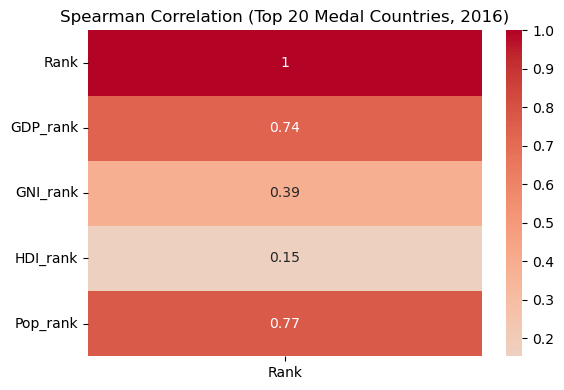

In [202]:

# top20 countries 
top20 = full_df[(full_df['Year'] == 2016)].nsmallest(20, 'Rank').copy()

# extract columns
corr_cols = ['Rank', 'GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']
top20_corr = top20[corr_cols].dropna()

# spearman correlation 
corr_matrix = top20_corr.corr(method='spearman')

# result
print(corr_matrix['Rank'].sort_values())

# viz
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix[['Rank']], annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation (Top 20 Medal Countries, 2016)")
plt.tight_layout()
plt.show()


The interpretation of the correlation analysis above yields the following results:

1. There is a clear relationship between GDP/population rankings and Olympic performance.
(Wealthier or more populous countries tend to win more medals.)

2. GNI per capita shows only a moderate correlation.
(The overall national resources seem to have more influence on medal counts than individual income levels.)

3. HDI shows little to no correlation.
(A higher quality of life does not necessarily translate into better Olympic performance.)

In summary, a key insight is that top-performing countries in the Olympics tend to rank highly and evenly across various indicators.

However, I found it puzzling that HDI and GNI had such low correlations. I suspected that this might be due to a few countries among the top 20 medal winners having unusually low HDI and GNI scores—acting as outliers—which could have skewed or diluted the overall correlation. I decided to test this hypothesis. 

 Filtered Countries:
               Team  Rank   Population  HDI_rank  GNI_rank
1612  United States     1  326874621.4      18.0       8.0
1613  Great Britain     2   65591386.0      15.5      23.0
1616        Germany     5   82324378.4       4.5      13.5
1617          Japan     6  126849698.6      20.0      24.0
1618         France     7   63943825.8      28.0      22.0
1619    South Korea     8   51164458.8      23.5      27.5
1621          Italy    10   60086440.6      31.5      25.5

 Spearman Correlation with Olympic Rank:
GNI_rank    0.785714
GDP_rank    0.821429
HDI_rank    0.821429
Pop_rank    0.821429
Rank        1.000000
Name: Rank, dtype: float64


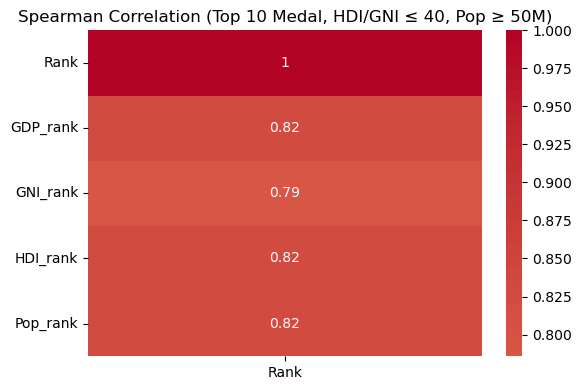

In [262]:
# top 10 countries
top20 = full_df[full_df['Year'] == 2016].nsmallest(10, 'Rank').copy()

# filtering by three conditions
filtered = top20[
    (top20['HDI_rank'] <= 40) &
    (top20['GNI_rank'] <= 40) &
    (top20['Population'] >= 50_000_000)
].dropna()

# correlation
corr_cols = ['Rank', 'GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']
filtered_corr = filtered[corr_cols].corr(method='spearman')

# result
print(" Filtered Countries:")
print(filtered[['Team', 'Rank', 'Population', 'HDI_rank', 'GNI_rank']])
print("\n Spearman Correlation with Olympic Rank:")
print(filtered_corr['Rank'].sort_values())

# viz
plt.figure(figsize=(6, 4))
sns.heatmap(filtered_corr[['Rank']], annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation (Top 10 Medal, HDI/GNI ≤ 40, Pop ≥ 50M)")
plt.tight_layout()
plt.show()

**I applied the following filtering criteria:**

Countries ranked within the top 30 globally in both GNI (per capita) and HDI.

Countries with a population of over 50 million.

Countries ranked in the top 10 in Olympic medal standings.

The criterion of a population over 50 million was used because it is often considered an indicator of internationally influential developed countries. In reality, there are nations with extremely high per capita GNI but minimal or no global influence. Conversely, some countries have a high total GDP simply due to their large population, even though their actual global impact or quality of life is relatively low.

For example, imagine a wealthy individual purchasing a small island and declaring it a nation. That country might have the highest per capita GNI and perhaps even HDI in the world, yet it would have little to no international presence or influence. While this is an extreme case, it highlights the potential for confusion. To avoid such distortions, various institutions and media outlets often use a population threshold of 50 million—alongside metrics like military power—as a criterion for defining globally influential developed countries.

When the correlation analysis was conducted under these conditions, the results showed strong correlations—typically above 0.8—across most indicators. This supports the conclusion that economic strength and population size have a significant impact on Olympic medal rankings.

### 3-2 Correlation between Olympic medals & indicators - 2

To compare this phenomenon, I also analyzed the medal rankings and indicator rankings of lower-ranking countries

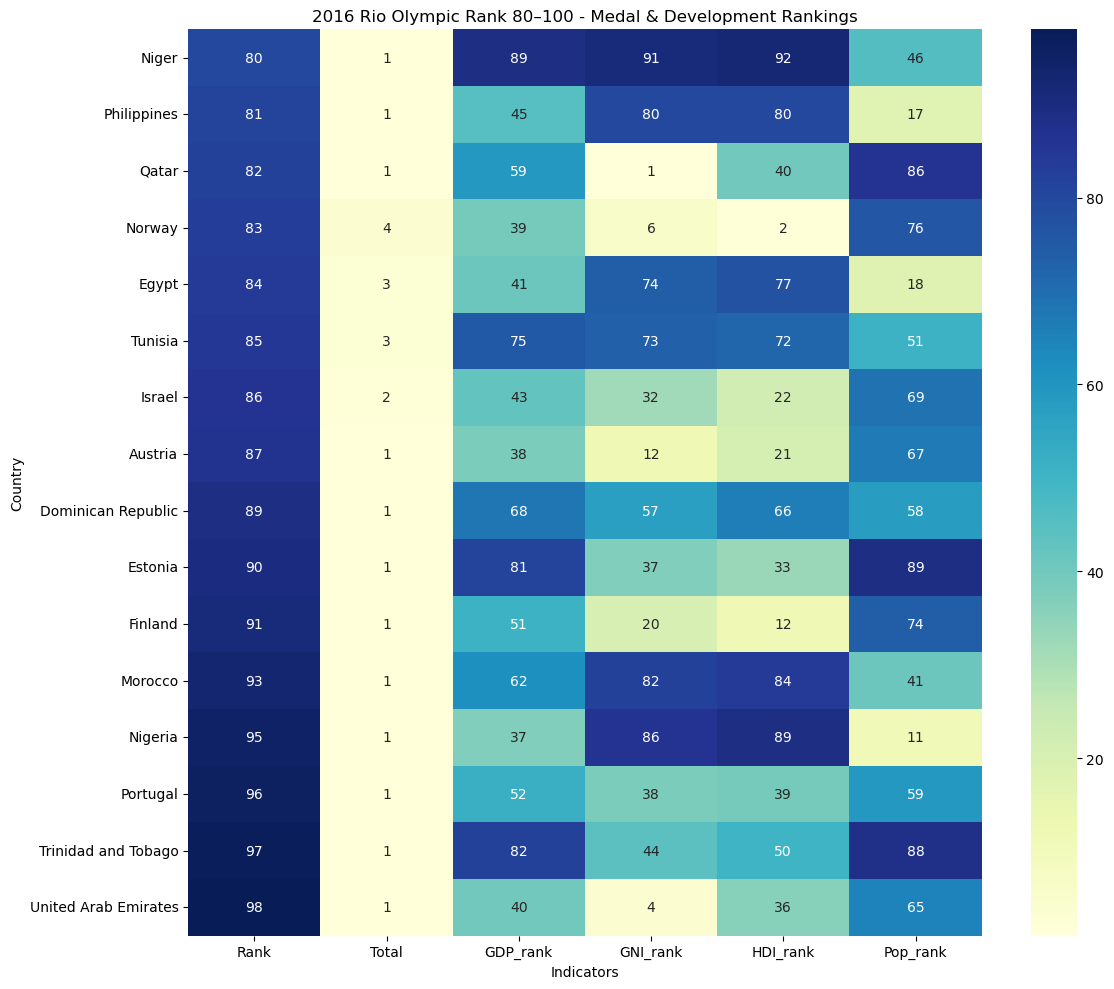

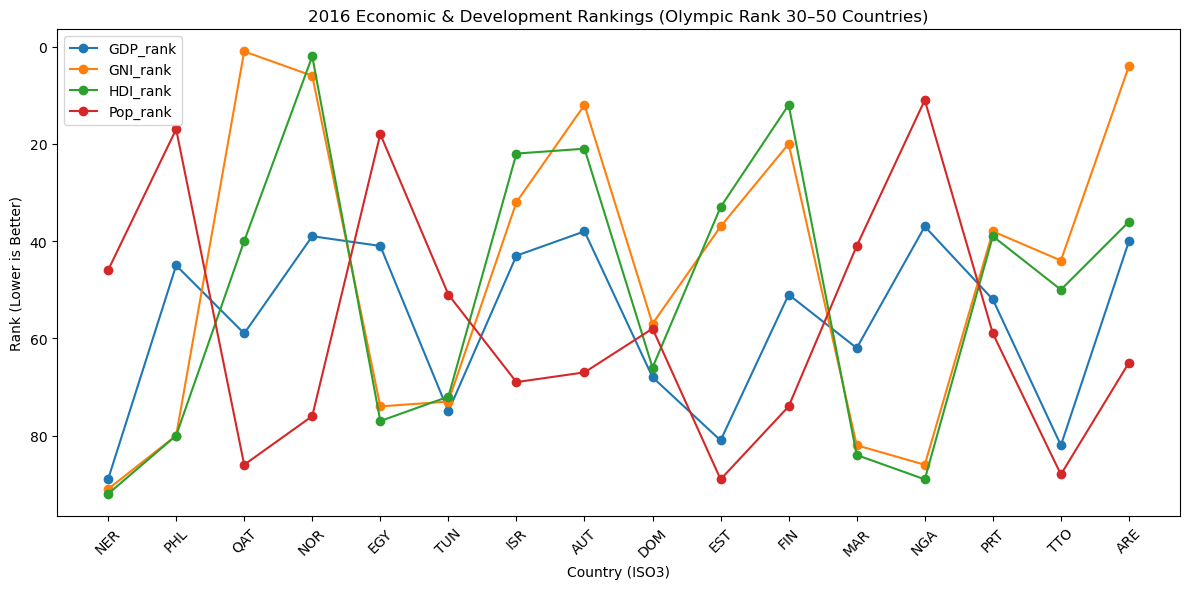

In [222]:
# Ranking 80~100 countries

df_2016 = full_df[full_df['Year'] == 2016].copy()
mid_range = df_2016[(df_2016['Rank'] >= 80) & (df_2016['Rank'] <= 100)].copy()

mid_range['Total'] = mid_range['Gold'] + mid_range['Silver'] + mid_range['Bronze']

cols_numeric = ['Rank', 'Total', 'GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']
table = mid_range.set_index('Team')[cols_numeric].sort_values('Rank')

plt.figure(figsize=(12, 10))
sns.heatmap(table, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title("2016 Rio Olympic Rank 80–100 - Medal & Development Rankings")
plt.ylabel("Country")
plt.xlabel("Indicators")
plt.tight_layout()
plt.show()

ranking_cols = ['GDP_rank', 'GNI_rank', 'HDI_rank', 'Pop_rank']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(12, 6))
for i, col in enumerate(ranking_cols):
    plt.plot(mid_range['ISO3'], mid_range[col], marker='o', label=col, color=colors[i])

plt.gca().invert_yaxis()
plt.title("2016 Economic & Development Rankings (Olympic Rank 30–50 Countries)")
plt.ylabel("Rank (Lower is Better)")
plt.xlabel("Country (ISO3)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


An analysis of countries ranked between 80th and 100th revealed that, compared to the previously examined top 20 countries, their overall indicator rankings were significantly lower. Even at a glance, the charts for these countries display darker colors—indicating lower global rankings—than those of the top 20, with most indicators falling within the 50th to 100th range.

However, some countries like Norway, Finland, and Austria—which have high GNI or HDI—are also included in this group. These countries share a common characteristic: their population ranks are very low globally, typically around 70th place. Additionally, in the case of Norway, it traditionally excels in winter sports rather than summer sports. Since this analysis focuses solely on the Summer Olympics, Norway's ranking appears lower as a result.

# 4. Machine Learning Analysis

Finally, I conducted a machine learning-based analysis. My first approach was a classification analysis using logistic regression. Logistic regression is a hybrid algorithm that combines regression and classification, performing binary classification by predicting probabilities. In this analysis, it was used to predict whether a given country would rank in the Olympic top 10. The model achieved an F1-score of 0.80, indicating good performance in identifying the relatively few top 10 countries. However, due to the small proportion of top 10 countries in the dataset, class imbalance became an issue. Nevertheless, the results demonstrated a clear correlation between various indicators and Olympic performance.

### 4-1. LogisticRegression Analysis

In [257]:
full_df['Top10'] = full_df['Rank'] <= 10

df_model = full_df[full_df['Year'] == 2016].copy()

features = ['GDP', 'GNI_per_capita', 'HDI', 'Population']
df_model = df_model[features + ['Top10']].dropna()

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# data split
X = df_model[features]
y = df_model['Top10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model learn
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# eval
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  1]
 [ 0  2]]
              precision    recall  f1-score   support

       False       1.00      0.93      0.97        15
        True       0.67      1.00      0.80         2

    accuracy                           0.94        17
   macro avg       0.83      0.97      0.88        17
weighted avg       0.96      0.94      0.95        17



To address the limitations of the previous analysis, I expanded the dataset. This time, I used data from four Olympic Games in total, with the goal of predicting the performance of countries in the 2016 Olympics. I also developed code to support this analysis.

In [259]:
# Train & Test data set
train_years = [2000, 2004, 2008, 2012]
test_year = 2016

# Target Var
full_df['Top20'] = full_df['Rank'] <= 20

# columns and drop
features = ['GDP', 'GNI_per_capita', 'HDI', 'Population']
df_ml = full_df[features + ['Top20', 'Year']].dropna()

# split
train_df = df_ml[df_ml['Year'].isin(train_years)]
test_df = df_ml[df_ml['Year'] == test_year]

X_train = train_df[features]
y_train = train_df['Top20']
X_test = test_df[features]
y_test = test_df['Top20']

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Confusion Matrix:
 [[42 21]
 [ 8 12]]

 Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.67      0.74        63
        True       0.36      0.60      0.45        20

    accuracy                           0.65        83
   macro avg       0.60      0.63      0.60        83
weighted avg       0.73      0.65      0.67        83



The prediction results showed an overall modest performance, with an F1-score of 0.45. In particular, for the true Top 20 countries, the model demonstrated low precision but a recall of 60%, meaning that while some top-ranked countries were successfully identified, there were also many misclassifications. To improve performance, I used GridSearch to optimize the model's parameters and re-ran the prediction.

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# features and target
features = ['GDP', 'GNI_per_capita', 'HDI', 'Population']
df_ml = full_df[full_df['Year'].isin([2000, 2004, 2008, 2012, 2016])].copy()
df_ml['Top20'] = df_ml['Rank'] <= 20
df_ml = df_ml[features + ['Top20', 'Year']].dropna()

train_years = [2000, 2004, 2008, 2012]
test_year = 2016

X_train = df_ml[df_ml['Year'].isin(train_years)][features]
y_train = df_ml[df_ml['Year'].isin(train_years)]['Top20']
X_test = df_ml[df_ml['Year'] == test_year][features]
y_test = df_ml[df_ml['Year'] == test_year]['Top20']

# pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# grid parameter
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__class_weight': [None, 'balanced']
}

# Grid_CV 
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# print parameters
print("Best Params:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

# predict
y_pred = grid.predict(X_test)

# evaluation
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Best Params: {'logreg__C': 0.1, 'logreg__class_weight': 'balanced'}
Best CV F1 Score: 0.49911194496560346

 Confusion Matrix:
 [[41 22]
 [ 5 15]]

 Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.65      0.75        63
        True       0.41      0.75      0.53        20

    accuracy                           0.67        83
   macro avg       0.65      0.70      0.64        83
weighted avg       0.77      0.67      0.70        83



The optimal hyperparameters were found to be C = 0.1 and class_weight = 'balanced'. The average F1-score during cross-validation (CV) was approximately 0.499. On the test set, the prediction results showed an accuracy of 67%, a recall of 0.75 for the Top 20 class (True), and an F1-score of 0.53. These results indicate improved performance in handling class imbalance compared to the baseline logistic regression model. Notably, the model showed meaningful improvement in identifying the minority class—Top 20 countries—making this a significant enhancement.

### 4-2. Random Forest

This analysis applied the Random Forest algorithm in place of logistic regression to improve prediction performance. Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their outputs to make final predictions. It is well-suited for capturing complex, non-linear relationships in data and is robust to interactions among variables, making it a popular choice for structured data classification tasks.

In [255]:
from sklearn.ensemble import RandomForestClassifier

# features and target
features = ['GDP', 'GNI_per_capita', 'HDI', 'Population']
df_ml = full_df[full_df['Year'].isin([2000, 2004, 2008, 2012, 2016])].copy()
df_ml['Top20'] = df_ml['Rank'] <= 20
df_ml = df_ml[features + ['Top20', 'Year']].dropna()

train_years = [2000, 2004, 2008, 2012]
test_year = 2016

X_train = df_ml[df_ml['Year'].isin(train_years)][features]
y_train = df_ml[df_ml['Year'].isin(train_years)]['Top20']
X_test = df_ml[df_ml['Year'] == test_year][features]
y_test = df_ml[df_ml['Year'] == test_year]['Top20']

# PIEPELINE setting
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# GridSearch
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__class_weight': [None, 'balanced']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# print optimal parameter
print(" Best Parameters:", grid.best_params_)
print(f" Best CV F1 Score: {grid.best_score_:.3f}")

# predict and eval
y_pred = grid.predict(X_test)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Best Parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 5, 'rf__n_estimators': 100}
 Best CV F1 Score: 0.564

 Confusion Matrix:
 [[45 18]
 [ 6 14]]

 Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.71      0.79        63
        True       0.44      0.70      0.54        20

    accuracy                           0.71        83
   macro avg       0.66      0.71      0.66        83
weighted avg       0.78      0.71      0.73        83



The optimal settings for the Random Forest model were n_estimators = 100, max_depth = 5, and class_weight = 'balanced', the latter addressing the issue of class imbalance. The model achieved an accuracy of 71% and an F1-score of 0.54 for the Top 20 class. This represents a slight improvement over the previously applied logistic regression model (accuracy of 67%, F1-score of 0.53), particularly in terms of achieving a more balanced trade-off between precision and recall. These results suggest that the Random Forest model more effectively captured the nonlinear and complex relationships among variables, delivering marginally better classification performance than the simpler, linear logistic regression approach.

### Feature Importance Visualization

This code visualizes the feature importance—i.e., the contribution of each variable to the prediction—based on the previously optimized Random Forest model. After extracting the best model using GridSearchCV, the importance of each feature is calculated using the feature_importances_ attribute.

In [237]:
# Extracting RandomForestClassifier from the optimal model
best_rf = grid.best_estimator_.named_steps['rf']

# Feature Importance Extraction
importances = best_rf.feature_importances_
feature_names = X_train.columns

# sort
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)


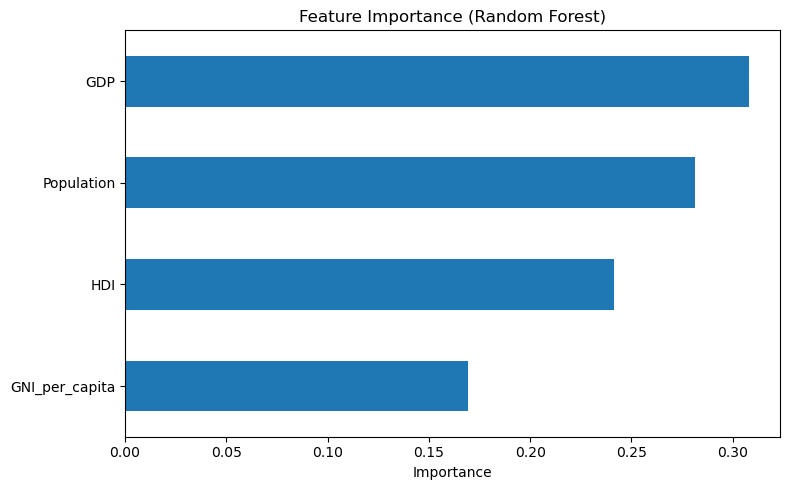

In [238]:
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### 4-3. KMeans Clustering

This time, I shifted the analytical approach from regression/classification to clustering. The analysis visualizes the results of clustering countries that participated in the 2016 Olympics based on their medal performance and economic/development indicators. In addition to the indicators previously used, a new feature called medals_per_million was created, representing the number of medals won per one million people. After normalizing the data, clustering was performed using KMeans (n=4), with the optimal number of clusters determined through the Elbow method. The results were then visualized in two dimensions using PCA (Principal Component Analysis) for dimensionality reduction.

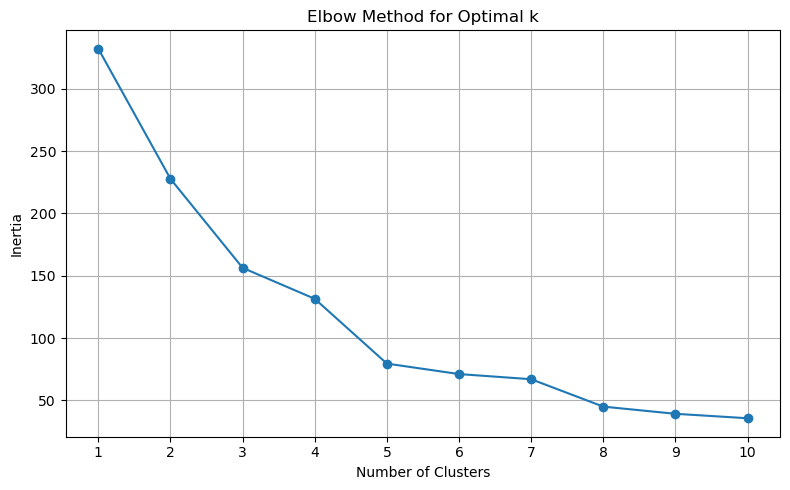

In [250]:
# Elbow Method for number of the K 
features = ['Medal_per_million', 'GDP', 'HDI', 'GNI_per_capita']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

inertias = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.show()

In [241]:
features = ['Gold', 'Silver', 'Bronze', 'GDP', 'HDI', 'Population']
df = full_df[full_df['Year'] == 2016].copy()
df = df.dropna(subset=features)

df['Total'] = df['Gold'] + df['Silver'] + df['Bronze']
df['Medal_per_million'] = df['Total'] / (df['Population'] / 1_000_000)

# selected feature
X = df[['Medal_per_million', 'GDP', 'HDI', 'GNI_per_capita']]

# Scaling + KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42) # set N = 4
df['Cluster'] = kmeans.fit_predict(X_scaled)

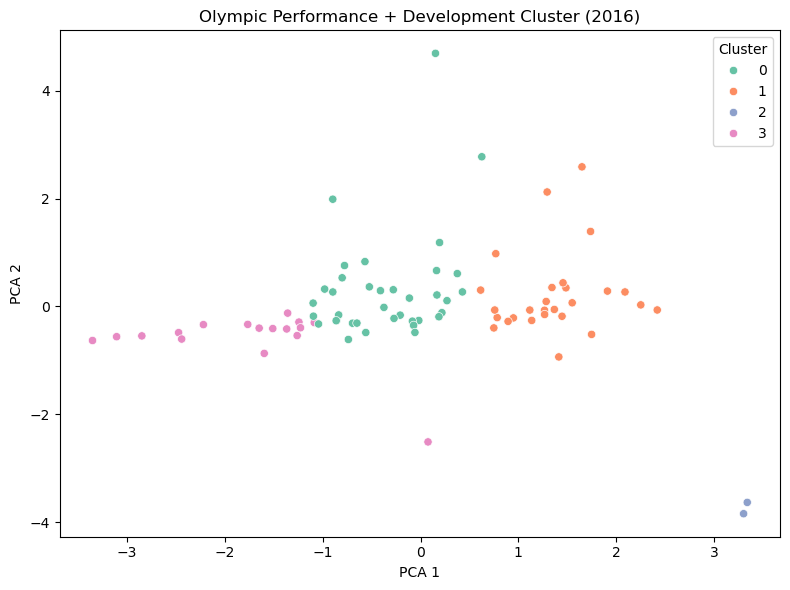

In [242]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Olympic Performance + Development Cluster (2016)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [243]:
pd.DataFrame(pca.components_, columns=X.columns, index=['PCA1', 'PCA2']).T

,PCA1,PCA2
Medal_per_million,0.138832,0.777556
GDP,0.306742,-0.618428
HDI,0.663914,0.113403
GNI_per_capita,0.667722,0.009671


**Interpretation of PCA Axes**

PCA1: Represents the economic/development level, strongly associated with GNI per capita, HDI, and GDP.

- A higher PCA1 value indicates a wealthier and more highly developed country.

PCA2: Represents Olympic efficiency, primarily driven by medals per million population.

- A higher PCA2 value indicates greater medal efficiency relative to population size.

In [246]:
# Country lists for Clusters
for c in sorted(df['Cluster'].unique()):
    print(f"\n Cluster {c}:")
    print(df[df['Cluster'] == c]['Team'].tolist())


 Cluster 0:
['Russia', 'Hungary', 'Brazil', 'Jamaica', 'Croatia', 'Cuba', 'Kazakhstan', 'Colombia', 'Iran', 'Greece', 'Argentina', 'Ukraine', 'Serbia', 'Poland', 'Thailand', 'Slovakia', 'Georgia', 'Azerbaijan', 'Belarus', 'Turkey', 'Armenia', 'Romania', 'Bahamas', 'Fiji', 'Russia-2', 'Malaysia', 'Mexico', 'Algeria', 'Lithuania', 'Bulgaria', 'Mongolia', 'Grenada', 'Tunisia', 'Dominican Republic', 'Estonia', 'Portugal', 'Trinidad and Tobago']

 Cluster 1:
['Great Britain', 'Germany', 'Japan', 'France', 'South Korea', 'Australia', 'Italy', 'Netherlands', 'Spain', 'New Zealand', 'Canada', 'Switzerland', 'Denmark', 'Sweden', 'Belgium', 'Czech Republic', 'Slovenia', 'Bahrain', 'Spain-2', 'Singapore', 'Ireland', 'Qatar', 'Norway', 'Israel', 'Austria', 'Finland', 'United Arab Emirates']

 Cluster 2:
['United States', 'United States-2']

 Cluster 3:
['China', 'Kenya', 'Uzbekistan', 'South Africa', 'Ethiopia', 'Vietnam', "Cote d'Ivoire", 'Jordan', 'Tajikistan', 'Indonesia', 'India', 'Burundi', 

### Example Countries and Interpretation by Cluster
**Cluster 0: Mid-level economy + strong medal performance**
#### Examples: Russia, Iran, Cuba, Brazil, Hungary, Poland, Mexico

**Cluster 1: High income + stable development**
#### Examples: Germany, Japan, South Korea, UK, France, Australia, Netherlands

**Cluster 2: Single-cluster (superpower)**
#### Example: United States

**Cluster 3: Large population + low income / low medal efficiency**
#### Examples: China, India, Kenya, Nigeria, Egypt, Indonesia, Vietnam

### Clustering Result Summary
This analysis clustered countries that participated in the 2016 Olympics based on a combination of medal performance and economic/development indicators, revealing that countries are not grouped solely by economic status. Instead, meaningful groupings emerge based on medal efficiency and strategic characteristics.

Notably, the United States formed a standalone cluster due to its overwhelmingly dominant performance. Western European and East Asian countries formed a distinct group characterized by high income and stable results. In contrast, countries with large populations and strong growth potential—such as China, India, and Nigeria—were grouped together due to their low medal efficiency. Countries like Russia, Brazil, and Iran were classified into a middle cluster, reflecting mid-range economic levels and consistent performance.

These cluster-specific patterns provide an integrated perspective on each country's sports investment strategy, development status, and performance efficiency. Moreover, tracking how these clusters evolve over time could offer valuable insights into national development trajectories and sports policy shifts in future Olympic cycles.



# Conclusion

This project aimed to analyze the relationship between Olympic medal rankings and key national indicators such as GDP, GNI per capita, HDI, and population. After integrating and preprocessing multiple external datasets, we applied regression/classification and clustering techniques to explore patterns and predict medal performance based on socioeconomic factors.

The analysis showed that top-performing countries in Olympic medal rankings generally ranked high in major economic and development indicators such as GDP, HDI, and population. In contrast, countries with lower medal ranks tended to score lower on these indicators, clearly revealing a structural gap between the two groups. This trend was clearly visualized in the early heatmap analysis and was partially reflected in the predictive modeling using logistic regression and random forest classifiers. However, due to data loss from missing values and limitations in the external features used, the machine learning models did not achieve fully satisfactory predictive performance.

One of the most important takeaways from this project is that over 60% of the total time and effort was dedicated to exploratory data analysis (EDA) and data preprocessing. As the project involved merging a variety of independent data files, a substantial amount of time was required for tasks such as handling missing values, unifying country codes (NOC vs ISO3), interpolating population data, and integrating indicators. These preparatory steps formed the critical foundation for all subsequent analysis and modeling. If the project were to be expanded in the future, we expect that using a more robust baseline dataset and incorporating more features would lead to improved performance.

In conclusion, this project demonstrated that Olympic sports performance can be interpreted through the lens of economic and development data, and that data science techniques can be used to uncover the geopolitical and socioeconomic structures underlying international sports outcomes.